**2. Why is it generally preferable to use a Logistic Regression classifier rather than a classical Perceptron (i.e., a single layer of threshold logic units trained using the Perceptron training algorithm)? How can you tweak a Perceptron to make it equivalent to a Logistic Regression classifier?**

Logistic regression can assign probabilities giving an indication of the confidence of the prediction. The perceptron need only change the activation function from step to sigmoid and change the learning to use gradient descent.

**3. Why was the logistic activation function a key ingredient in training the first MLPs?**

The logistic activation is differentiable and thus allowed gradient based learning

**4. Name three popular activation functions.**

Sigmoid, hyperbolic tangent, and rectified linear units are some of the most common activations

**5. Suppose you have an MLP composed of one input layer with 10 passthrough neurons, followed by one hidden layer with 50 artificial neurons, and finally one output layer with 3 artificial neurons. All artificial neurons use the ReLU activation function.**

- What is the shape of the input matrix $\mathbf{X}$?
- What about the shape of the hidden layer’s weight vector $\mathbf{W}_h$, and the shape of its bias vector $\mathbf{b}_h$?
- What is the shape of the output layer’s weight vector $\mathbf{W}_o$, and its bias vector $\mathbf{b}_o$?
- What is the shape of the network’s output matrix $\mathbf{Y}$?
- Write the equation that computes the network’s output matrix $\mathbf{Y}$ as a function of $\mathbf{X}$, $\mathbf{W}_h$, $\mathbf{W}_h$, $\mathbf{b}_h$, $\mathbf{W}_o$ and $\mathbf{b}_o$.

- $\mathbf{X} \in \mathbf{R}^{10}$
- $\mathbf{W}_h \in \mathbf{R}^{50 \times 10}$ and $\mathbf{b}_h \in \mathbf{R}^{50}$
- $\mathbf{W}_o \in \mathbf{R}^{3 \times 10}$ and $\mathbf{b}_o \in \mathbf{R}^{3}$
- $\mathbf{Y} \in \mathbf{R}^{3}$
- $\mathbf{Y} = \mathbf{W}_o\text{relu}\left(\mathbf{W}_h\mathbf{X} + \mathbf{b}_h\right) + \mathbf{b}_o$

**6. How many neurons do you need in the output layer if you want to classify email into spam or ham? What activation function should you use in the output layer? If instead you want to tackle MNIST, how many neurons do you need in the output layer, using what activation function?**

You will most likely use the number of classes as the number of output nodes. Theoretically could get away with one less

**7. What is backpropagation and how does it work? What is the difference between backpropagation and reverse-mode autodiff?**

Backpropagation is gradient descent with reverse mode differentiation. Originally it was a conceived as a way of sending the error of the output back through the network to adjust the weights so as to better predict the correct output for that example

**8. Can you list all the hyperparameters you can tweak in an MLP? If the MLP overfits the training data, how could you tweak these hyperparameters to try to solve the problem?**

The main hyperparameters to tune are the learning rate, the numebr of epochs of training, the size of the minibatches in SGD, and the regularization penalty. Overfitting can be ameliorated by early stopping when the error on some validation set starts increasing.

**9. Train a deep MLP on the MNIST dataset and see if you can get over 98% precision. Just like in the last exercise of Chapter 9, try adding all the bells and whistles (i.e., save checkpoints, restore the last checkpoint in case of an interruption, add summaries, plot learning curves using TensorBoard, and so on).**

In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
fashion_mnist = input_data.read_data_sets(
    "data/fashion", 
    source_url="http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/"
)

m = 28
n = 28
num_classes = 10

class_to_label ={
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot",
}

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/fashion/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


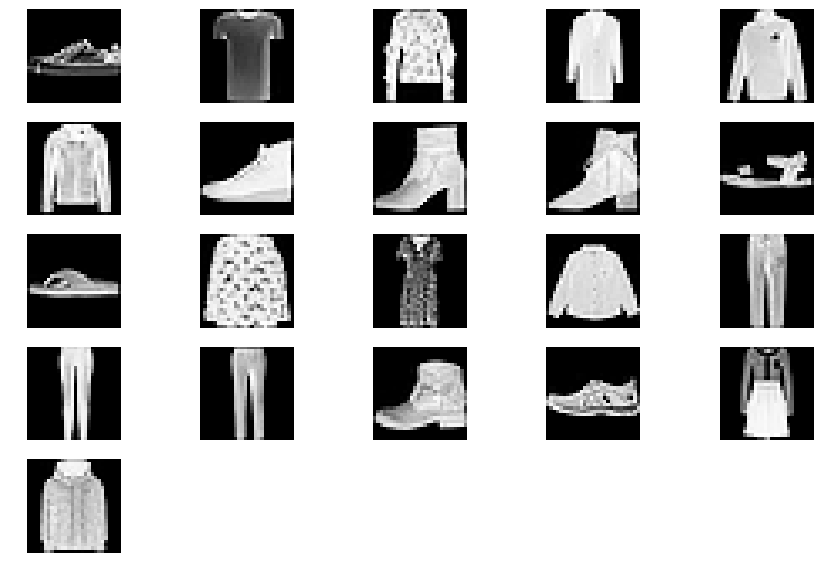

In [3]:
num_sample_images = 21
sample_images, sample_labels = fashion_mnist.train.next_batch(num_sample_images)

c = 5
r = np.ceil(num_sample_images / c)

plt.figure(figsize=(15,10));
for i in range(num_sample_images):
    plt.subplot(r,c,i+1);
    plt.imshow(sample_images[i].reshape(m,n), cmap="Greys_r");
    plt.axis("off")

In [11]:
%run ann_param_search.py --n-trials 25

No saved HyperOpt Trials object found. Starting from scratch
Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz
--------------------------------------------------
MLflow Run ID: c3f4dc5db22843c4bb5dad55c9d05162
--------------------------------------------------
  0%|          | 0/25 [00:00<?, ?it/s, best loss: ?]WARNING:tensorflow:From /Users/chaaland/Documents/Learning/HandsOnMachineLearning/Chapter10/ann_training.py:32: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.
--------------------------------------------------
MLflow Run ID: 9f1c914c9e494229a3b07268d061ff23
--------------------------------------------------
--------------------------------------------

AttributeError: 'dict' object has no attribute 'best_trial'